## Assignment 4 - Group 4

#### Question 2: Classification : Convolutional Neural Networks


##### Importing the libraries

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [8]:
#Setting the random seeds to control the randomness each time the model is run
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

### 2.1 [CM4] Design and Implementation of Model

### Data Loading and Analysis

In [9]:
data=np.load('/content/drive/MyDrive/Colab/fashion_mnist_dataset_train.npy',allow_pickle=True)
data_as_list=data.tolist()
data_features=data_as_list['features']
data_target=data_as_list['target']

print(data_features.shape)
print(data_target.shape)

(60000, 28, 28)
(60000,)


The dataset consists of 60,000 images and each image has 784 features. Each image consists of 28x28 pixels.

In [10]:
data_target

array([5., 2., 1., ..., 3., 1., 4.])

Converting the float values to integer

In [11]:
data_target=data_target.astype(int)

In [12]:
np.unique(data_target)

array([1, 2, 3, 4, 5])

### Using Machine Learning Algorithms for classification (to later compare with DL model)

In [13]:
data_features1 = data_features.reshape(len(data_features), 784)
train_x, test_x, train_y, test_y = train_test_split(data_features1, data_target, test_size=0.1666667, random_state=275)
X_train, X_test, y_train, y_test = train_x, test_x, train_y, test_y

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49999, 784)
(49999,)
(10001, 784)
(10001,)


In [14]:
## Using Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
dec_tree_clf.fit(X_train, y_train)
y_train_predict = dec_tree_clf.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_train_predict)

print("Decision Tree Accuracy: ", round(dec_tree_accuracy,2))

Decision Tree Accuracy:  0.76


In [15]:
## Using XGBoost Classifier
import xgboost
from xgboost import XGBClassifier
start_time = time.time()
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf.fit(X_train, y_train)
elapsed_time = time.time() - start_time
y_train_predict = xgb_clf.predict(X_test)
XGBoost_accuracy = accuracy_score(y_test, y_train_predict)
print("XGBoost Accuracy: ", round(XGBoost_accuracy,2))
print("Time taken for the training (in seconds): {}".format(elapsed_time))

XGBoost Accuracy:  0.86
Time taken for the training (in seconds): 279.22355461120605


Using the ML algorithms we notice that Decision Tree Classifier gave an accuracy of 76% and XGBoost algorithm gave an accuracy of 86%

Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 5 different classes(the real dataset has 10 classes). The dataset contains 60000 images.

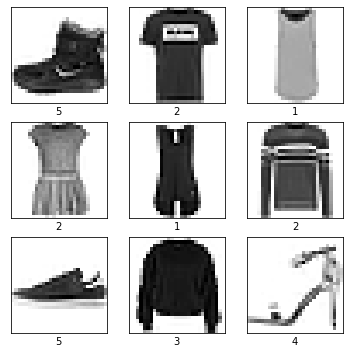

In [16]:
# plotting first 9 images
pyplot.figure(figsize=(6,6))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.imshow(data_features[i],cmap=pyplot.cm.binary)
    pyplot.xlabel(data_target[i])
pyplot.show()

We have one more dimension channels (color) for the images, so we add it to the dimensions of data_features with the help of reshape() method. It is a single color - 'grayscale' here and hence, channels=1).

In [17]:
data_features = data_features.reshape((60000, 28, 28, 1))

In [18]:
data_target_new=data_target-1

The dataset is split into 80%, 10%, 10% for train, valid and test sets respectively. A random state was introduced.

In [19]:
#Splitting the data into train, validation, and test sets (80%, 10%, 10%)
train_valid_x, test_x, train_valid_y, test_y = train_test_split(data_features, data_target_new, test_size=0.1, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.1111, random_state=275)

In [20]:
valid_x.shape,train_x.shape,test_x.shape

((6000, 28, 28, 1), (48000, 28, 28, 1), (6000, 28, 28, 1))

In [21]:
valid_y.shape,train_y.shape,test_y.shape

((6000,), (48000,), (6000,))

### Implementing Convolutional Neural Networks

##### Implementation 1 with 3 layered simple architecture

In [22]:
#Creating convolutional layers
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
conv2 = layers.Conv2D(64, (3,3), activation='relu')
conv3 = layers.Conv2D(128, (3,3), activation='relu')

#Creating Max Pooling Layers
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))
max_pool_3 = layers.MaxPooling2D((2,2))

flat_layer = layers.Flatten()

#Creating dense layers
fc = layers.Dense(128, activation='relu')
output = layers.Dense(5, 'softmax')

In [23]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
train_valid_x.shape

(54000, 28, 28, 1)

In [27]:
model_obj=model.fit(train_x, train_y, epochs=20,validation_data=(valid_x,valid_y))

Epoch 1/20
1500/1500 [==============================] - 40s 5ms/step - loss: 0.5996 - accuracy: 0.7530 - val_loss: 0.4121 - val_accuracy: 0.8377
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3019 - accuracy: 0.8797 - val_loss: 0.2792 - val_accuracy: 0.8888
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2341 - accuracy: 0.9048 - val_loss: 0.2401 - val_accuracy: 0.9072
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1822 - accuracy: 0.9278 - val_loss: 0.2535 - val_accuracy: 0.9012
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1549 - accuracy: 0.9389 - val_loss: 0.2675 - val_accuracy: 0.9000
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1259 - accuracy: 0.9512 - val_loss: 0.2722 - val_accuracy: 0.9062
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0989 - accuracy: 0.9624 - val_loss: 0.2771 - val_accuracy

In [28]:
test_loss, test_accuracy = model.evaluate(test_x, test_y)

188/188 [==============================] - 1s 3ms/step - loss: 0.5671 - accuracy: 0.9043


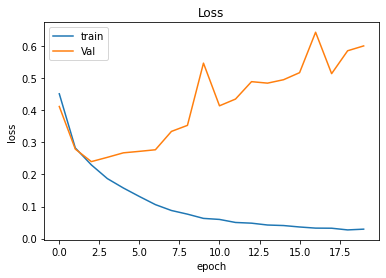

In [29]:
pyplot.plot(model_obj.history['loss'])
pyplot.plot(model_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'Val'], loc='upper left')
pyplot.show()

* A 3 layered simple CNN architecture was used to build the model. Adam optimizer was used. Validation data was passed during the fit which internally would use this data for test.
* Loss vs Epochs graph (Train, Validation loss vs Epoch) has been plotted above.

* As we can see from the graph, validation loss didn't reduce throughout and is increased with increase in number of epochs whereas training loss reduced. 
* Model is considered to be overfit if training loss is reduced but the test loss increased, that is, the model performed well on train set but not on test set. Hence regularization techniques are further implemented within the model to avoid overfitting.
* This model is not considered and will be imporved further to avoid overfitting.

##### Implementation 2 with Regularization and additional pooling layers

In [30]:
# Creating dropout layers
drop_1 = layers.Dropout(0.5)
drop_2 = layers.Dropout(0.5)
drop_3 = layers.Dropout(0.5)

In [31]:
# Let us create a new neural network by applying these above created Dropout Layers to the respecive convolutional Layers 
new_model_1 = models.Sequential()

new_conv1 = layers.Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1) )
new_conv2 = layers.Conv2D(64, (3,3),activation='relu')
new_conv3 = layers.Conv2D(128, (3,3),activation='relu')

new_model_1.add(new_conv1)
new_model_1.add(max_pool_1)
new_model_1.add(new_conv2)
new_model_1.add(max_pool_2)
new_model_1.add(new_conv3)
new_model_1.add(max_pool_3)
new_model_1.add(drop_3)
new_model_1.add(flat_layer)
new_model_1.add(layers.Dense(128, activation='relu'))
new_model_1.add(layers.Dense(5, 'softmax'))

In [32]:
new_model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
start_time = time.time()
new_model_1_obj=new_model_1.fit(train_valid_x, train_valid_y, epochs=20, shuffle=True, validation_split=0.1111)
elapsed_time = time.time() - start_time

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8840 - accuracy: 0.6320 - val_loss: 0.5144 - val_accuracy: 0.7975
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5646 - accuracy: 0.7678 - val_loss: 0.4284 - val_accuracy: 0.8260
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4899 - accuracy: 0.8018 - val_loss: 0.4064 - val_accuracy: 0.8362
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4518 - accuracy: 0.8151 - val_loss: 0.3672 - val_accuracy: 0.8522
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8302 - val_loss: 0.3580 - val_accuracy: 0.8597
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4020 - accuracy: 0.8392 - val_loss: 0.3698 - val_accuracy: 0.8493
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8450 - val_loss: 0.3482 - val_accuracy:

In [34]:
print("Time taken for the training (in seconds): {}".format(elapsed_time))

Time taken for the training (in seconds): 93.3540825843811


In [35]:
#Finding the loss and accuracy on test data
test_loss, test_accuracy = new_model_1.evaluate(test_x, test_y)

188/188 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8663


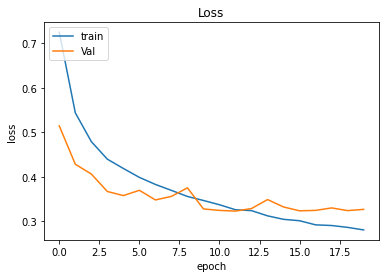

In [36]:
pyplot.plot(new_model_1_obj.history['loss'])
pyplot.plot(new_model_1_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'Val'], loc='upper left')
pyplot.show()

* The second implementation included additional pooling layers and a dropout layer (for regularization - to reduce the overfit).
* Adam optimizer, Relu activation function were used.
* Loss vs Epochs graph has been plotted.
* This model gave a test accuracy of 87% but yet as in the graph the model overfit the data after 10 epochs.
* Further modifying the model architecture and its parameters for optimal fit.

##### Implementation 3 with regularization and padding

In [37]:
new_model_2 = models.Sequential()

new_conv1 = layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(28,28,1) )
new_conv2 = layers.Conv2D(64, (3,3),padding='same', activation='relu')
new_conv3 = layers.Conv2D(128, (3,3),padding='same', activation='relu')

new_model_2.add(new_conv1)
new_model_2.add(max_pool_1)
new_model_2.add(new_conv2)
new_model_2.add(max_pool_2)
new_model_2.add(new_conv3)
new_model_2.add(max_pool_3)
new_model_2.add(drop_3)
new_model_2.add(flat_layer)
new_model_2.add(layers.Dense(128, activation='relu'))
new_model_2.add(layers.Dense(5, 'softmax'))

In [38]:
new_model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
start_time = time.time()
new_model_2_obj=new_model_2.fit(train_valid_x, train_valid_y, epochs=30, shuffle=True, validation_split=0.1111)
elapsed_time = time.time() - start_time

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7505 - accuracy: 0.6831 - val_loss: 0.3864 - val_accuracy: 0.8350
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3929 - accuracy: 0.8416 - val_loss: 0.2782 - val_accuracy: 0.8937
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3331 - accuracy: 0.8650 - val_loss: 0.2875 - val_accuracy: 0.8795
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3013 - accuracy: 0.8793 - val_loss: 0.2555 - val_accuracy: 0.8983
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2776 - accuracy: 0.8883 - val_loss: 0.2537 - val_accuracy: 0.8957
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2638 - accuracy: 0.8937 - val_loss: 0.3165 - val_accuracy: 0.8770
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2401 - accuracy: 0.9047 - val_loss: 0.2245 - val_accuracy:

In [40]:
print("Time taken for the training (in seconds): {}".format(elapsed_time))

Time taken for the training (in seconds): 146.59810495376587


In [41]:
#Finding the loss and accuracy on test data
test_loss, test_accuracy = new_model_2.evaluate(test_x, test_y)

188/188 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9185


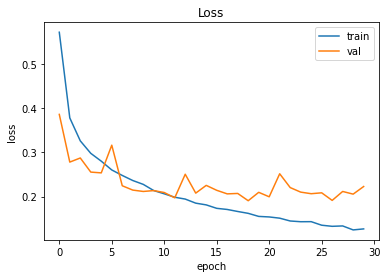

In [42]:
pyplot.plot(new_model_2_obj.history['loss'])
pyplot.plot(new_model_2_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')
pyplot.show()

* In this architecture, padding was introduced and it clearly had effect on the performance of the model. The training and validation loss decreased well within in 10 epochs compared to the previous model.
* If we have a look at the above graph. There's still an overshoot of val loss after 10 epochs. Using SGD as optimizer instead of Adam and increasing epochs to 30 to see if it could improve.

##### Implementation 4 with Regularization, Pooling and SGD as the optimizer

In [43]:
new_model_3 = models.Sequential()

new_conv1 = layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(28,28,1) )
new_conv2 = layers.Conv2D(64, (3,3),padding='same', activation='relu')
new_conv3 = layers.Conv2D(128, (3,3),padding='same', activation='relu')

new_model_3.add(new_conv1)
new_model_3.add(max_pool_1)
new_model_3.add(new_conv2)
new_model_3.add(max_pool_2)
new_model_3.add(new_conv3)
new_model_3.add(max_pool_3)
new_model_3.add(drop_3)
new_model_3.add(flat_layer)
new_model_3.add(layers.Dense(128, activation='relu'))
new_model_3.add(layers.Dense(5, 'softmax'))

In [44]:
new_model_3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
start_time = time.time()
new_model_3_obj=new_model_3.fit(train_valid_x, train_valid_y, epochs=30, shuffle=True, validation_split=0.1111)
elapsed_time = time.time() - start_time

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2456 - accuracy: 0.4717 - val_loss: 0.6988 - val_accuracy: 0.7000
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7408 - accuracy: 0.6940 - val_loss: 0.5653 - val_accuracy: 0.7763
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6334 - accuracy: 0.7410 - val_loss: 0.5048 - val_accuracy: 0.7925
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5502 - accuracy: 0.7790 - val_loss: 0.4172 - val_accuracy: 0.8465
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4883 - accuracy: 0.8048 - val_loss: 0.3973 - val_accuracy: 0.8432
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4565 - accuracy: 0.8166 - val_loss: 0.3527 - val_accuracy: 0.8667
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4170 - accuracy: 0.8310 - val_loss: 0.3320 - val_accuracy:

In [46]:
print("Time taken for the training (in seconds): {}".format(elapsed_time))

Time taken for the training (in seconds): 140.96291255950928


In [47]:
start_time = time.time()
test_loss, test_accuracy = new_model_3.evaluate(test_x, test_y)
elapsed_time = time.time() - start_time

188/188 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9093


In [48]:
print("Time taken for the training (in seconds): {}".format(elapsed_time))

Time taken for the training (in seconds): 0.479248046875


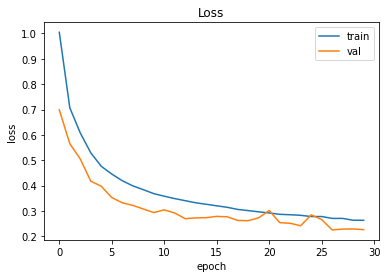

In [49]:
pyplot.plot(new_model_3_obj.history['loss'])
pyplot.plot(new_model_3_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')
pyplot.show()

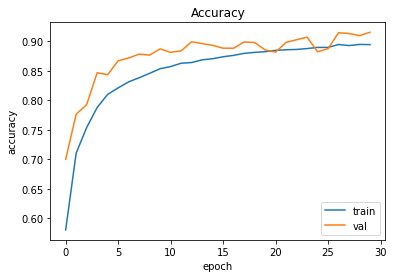

In [50]:
pyplot.plot(new_model_3_obj.history['accuracy'])
pyplot.plot(new_model_3_obj.history['val_accuracy'])
pyplot.title("Accuracy")
pyplot.ylabel("accuracy")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='lower right')
pyplot.show()

#### Final Model details
* This model performed well with a training accuracy of 89.44, validation accuracy of 91.50 and test accuracy of 90.93%
* Loss vs Epochs graph (Train, Validation loss vs Epoch) and Accuracy vs Epochs (Train, Validation accuracy vs epochs) have been plotted above.
* The model is performing fine and there is no overfitting as seen in the graph.
* Model architecture is discussed below.

With Machine Learning model - XGBoost, we had achieved a test accuracy of 86 %, and with Deep Learning model (CNN) we could achieve a test accuracy of 91 %. Thus, we got around 5% improvement in accuracy by using Deep Learning.

### Model Architecture

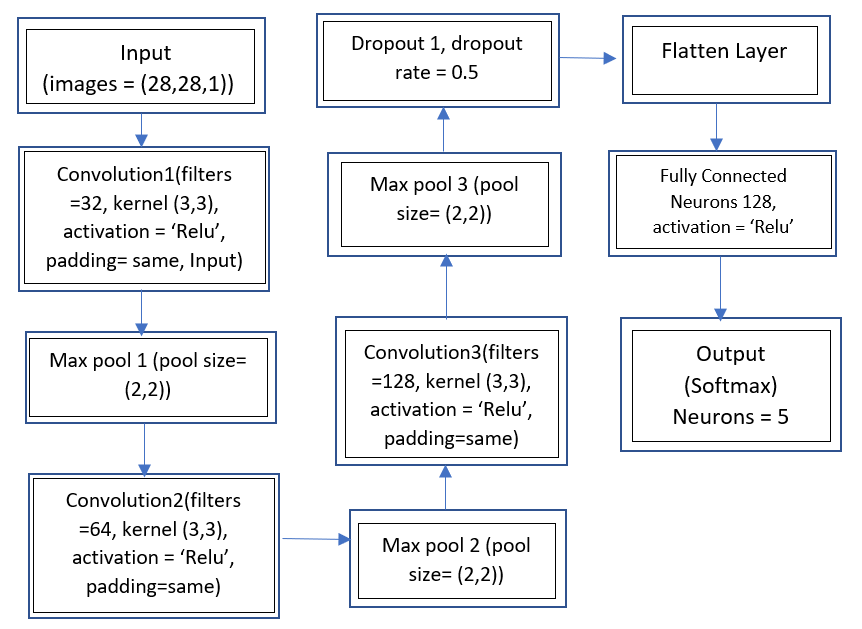

#### Model Description
* Input is first passed over three combinations of convolution and max pool layers. Then the output of these layers is passed over regularization layer with dropout rate of 0.5.
* The output from the previous layers is now passed to the flattening layer which converts the data into 1 dimensional array.
* This is fed to a fully connected neural network.
* Last output layer is a dense layer with softmax activation for 5 categories of data in the given fashion_mnist dataset.
* Initially we used the optimizer as "**adam**". However, the usage of the optimizer "**SGD**" gave us better results in terms of fit and accuracy (as discussed at each implementation above).

##### More details about the architecture
* We are using sequential API, a linear stack of layers. Each layer is added sequentially now on to this model.
* We have convolutional layers, which are the building blocks of ConvNets.
* Pooling layers are used for dimensionality reduction or down sampling of input. It reduces computational power and number of parameters to be learnt.
* Batch normalization to get zero mean and variance one. This allows network to learn features in a distributed way and the model generalizes the images better.
* Regularization - Dropout is used to avoid overfitting
* There are some dense layers and a fully connected neural network

### 2.2 [CM5] Implementation of our Design Choices


* We first tried XGBoost for classification and the accuracy was 86% and a decision tree which gave an accuracy of 76%.
* Then we started with CNNs. There are totally 4 implementations tried and they can be found under 2.1
* Started with simple layer and ended up with a complex architecture and the details are discussed below.
* Our first implementation was with 3 convolution layers and one max pool which didnt perform well as it had overfit.
* We introduced max pool layers after each convolution layer and added a drop out layer after these which reduced the overfit on train data. 
* We tried with different optimizers like Adam, SGD and Stochastic Gradient Descent helped the model to better generalize the data and prevented overfit.
 
 
The final model has been described at the last portion of 2.1 (also below to summarize) and its architecture was also explained clearly. Details of accuracies, plots were also discussed clearly.

In [51]:
new_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                 

* Above is the final architecture summary. 
* It consists of three back to back convolutional layers with max pooling layers in between. A dropout layer and a fully connected neural network with a dense layer comprising of softmax function as output layer. Padding was also introduced which improved the model's fit and accuracy.

### 2.2 [CM6] Results Analysis

### Run time perfomance for tranining and testing

##### The final model has been run both with and without the GPU.
##### Time taken for training and testing are reported below

|  | Trained on (Images) | Tested on (Images) | Training time(seconds) | Classification time(on test data)(seconds) |
| :- | :- | :- | :- | :- |
| Without GPU | 48,000 | 6000 | 4200 | 5 |
| With GPU | 48,000 | 6000 | 141 | 0.48 |


|  | Optimizer | Training time(seconds) |
| :- | :- | :- |
| With GPU | Adam | 146 |
| With GPU | SGD | 141 |


The above tables provide a clear idea of the runtime performance of the model. Training time varied with the optimizer used.
1. The time taken by our final CNN model for training is **141 sec**. Whereas the time taken for the model to test (from the time input is fed to the time we obtain the model decision) is **0.48 sec**
2. The time taken by our CNN model with "adam" optimizer for training is **146 sec**.
3. The time taken by the machine leaning algorithm XGBoost is **279 sec**


Comparision of different deep learning algorithms and parameters was already mentioned in the above sections, but re-writing them here to answer [CM6]

* We first tried ***XGBoost*** for classification and the accuracy was 86% and a ***decision tree*** which gave an accuracy of 76%.
* Then we started with ***CNN***s. Started with simple layer and ended up with a complex architecture and the details are discussed below.

* Our first implementation was with 3 convolution layers and one max pool which didnt perform well as it had overfit.
* We then introduced additional max pool layers after each convolution layer.
* We have also introduced regularization by adding drop out layer after the convolutional and max pool layers which reduced the overfit on train data. 
* We tried with different optimizers like Adam, SGD and Stochastic Gradient Descent helped the model to better generalize the data and prevented overfit.
* We have also tried padding which improved the model's fit and accuracy
 
* Activation functions like Relu, tanh were also tried and ***Relu*** gave better results.
* We modified number of epochs also and have chosen ***30*** as optimal one so as to not let the model overfit the data.

##### Plots to analyze the model better

* Training epochs vs Loss

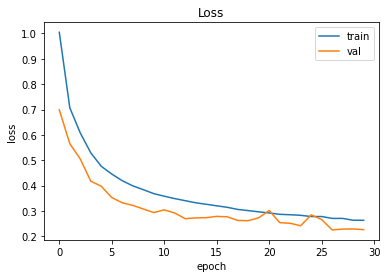

In [52]:
pyplot.plot(new_model_3_obj.history['loss'])
pyplot.plot(new_model_3_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')
pyplot.show()

* Classification accuracy vs Loss

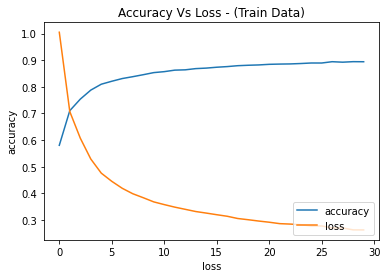

In [53]:
pyplot.plot(new_model_3_obj.history['accuracy'])
pyplot.plot(new_model_3_obj.history['loss'])
pyplot.title("Accuracy Vs Loss - (Train Data)")
pyplot.ylabel("accuracy")
pyplot.xlabel("loss")
pyplot.legend(['accuracy', 'loss'], loc='lower right')
pyplot.show()

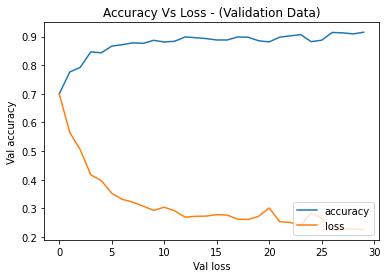

In [54]:
pyplot.plot(new_model_3_obj.history['val_accuracy'])
pyplot.plot(new_model_3_obj.history['val_loss'])
pyplot.title("Accuracy Vs Loss - (Validation Data)")
pyplot.ylabel("Val accuracy")
pyplot.xlabel("Val loss")
pyplot.legend(['accuracy', 'loss'], loc='lower right')
pyplot.show()

From the Epochs vs Loss plot, one can notice that the loss reduced as number of epochs increased and there is clearly no overfit. Various methods like regularization, change in optimizers helped in reducing the overfit.

Accuracy vs Loss plot on validation data shows that the model performed well (started from 70% and increased to 91%)

The model on test data gave an classification accuracy of 90.93%

In [64]:
(unique, counts) = np.unique(test_y, return_counts=True)
frequencies = np.asarray((unique, counts))
print(frequencies)

[[   0    1    2    3    4]
 [1198 1163 1242 1201 1196]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


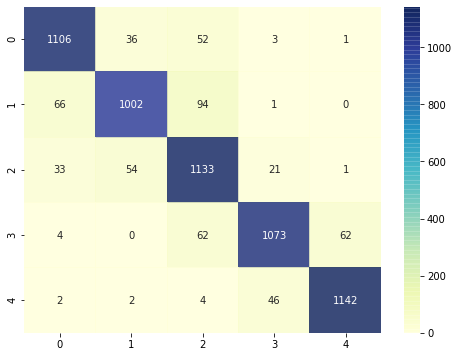

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    pyplot.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

plot_confusion_matrix(new_model_3, test_x, test_y)

##### Analyzing the confusion matrix
* The final model was able to identify 1106 images correctly as target 1 out of 1198 images. 
* Out of 1196 images which have target 5, 1142 were correctly identified which means only 4.5% of images were wrongly classified.
* ALso, total images of target as 3 are 1242 and out of these 1242, 1133 were correctly identified. Which means 8% are wrongly identified.

* This clearly shows that our model identifies the targets well and the error percentage is less than 10.

#### 2.3: Kaggle Competition Score

##### Participated on Kaggle and have submitted the predictions too. Please refer to Asg4-Grp 4 on Kaggle and also the corresponding python notebook was uploaded on Learn for reference.

#### Blogs, websites referred

https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/

https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529

https://ai.stackexchange.com/questions/5769/in-a-cnn-does-each-new-filter-have-different-weights-for-each-input-channel-or

https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

https://towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6

https://cloudxlab.com/blog/fashion-mnist-using-deep-learning-with-tensorflow-keras/